## Trying out the sketch library

https://colab.research.google.com/gist/bluecoconut/410a979d94613ea2aaf29987cf0233bc/sketch-demo.ipynb

In [24]:
import pandas as pd
import matplotlib

In [2]:
DATA_FILE = "../data/EnterococciDataDownload-20230403-044231.parquet"

In [44]:
df = pd.read_csv(DATA_FILE.replace(".parquet", ".csv"), parse_dates=True)

df["Date"] = pd.to_datetime(df["Date"])

/var/folders/pf/662q3gzd6413np78gpd4p9hr0000gn/T/ipykernel_37553/3732757974.py:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Date"] = pd.to_datetime(df["Date"])


In [3]:
# df = pd.read_parquet(DATA_FILE, )

In [42]:
df.head()

BeachId      Region          Council                     Site  Longitude   
0     95.0  Botany Bay  Bayside Council  Brighton Le Sands Baths   151.1567  \
1     95.0  Botany Bay  Bayside Council  Brighton Le Sands Baths   151.1567   
2     95.0  Botany Bay  Bayside Council  Brighton Le Sands Baths   151.1567   
3     95.0  Botany Bay  Bayside Council  Brighton Le Sands Baths   151.1567   
4     95.0  Botany Bay  Bayside Council  Brighton Le Sands Baths   151.1567   

   Latitude        Date  Enterococci (cfu/100ml)  
0  -33.9632  22/02/2023                    360.0  
1  -33.9632  21/03/2023                    240.0  
2  -33.9632  24/01/2023                      0.0  
3  -33.9632  27/02/2023                      4.0  
4  -33.9632  12/01/2023                      0.0

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300703 entries, 0 to 300702
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   BeachId                  300703 non-null  float64       
 1   Region                   300703 non-null  object        
 2   Council                  300703 non-null  object        
 3   Site                     300703 non-null  object        
 4   Longitude                300703 non-null  float64       
 5   Latitude                 300703 non-null  float64       
 6   Date                     300703 non-null  datetime64[ns]
 7   Enterococci (cfu/100ml)  262115 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(3)
memory usage: 18.4+ MB


In [7]:
import sketch

### Try Sketch

In [8]:
df.sketch.ask("What columns might contain PII data?")

In [9]:
df.sketch.ask("Can you suggest user-friendly names for each column? (output in order as an Python list)")

In [10]:
df.columns.to_list()

['BeachId',
 'Region',
 'Council',
 'Site',
 'Longitude',
 'Latitude',
 'Date',
 'Enterococci (cfu/100ml)']

In [11]:
df.sketch.howto("Get the place names from the latitude and longitude")

In [12]:
import geopy
from geopy.geocoders import Nominatim

In [21]:
# Get the place names from the latitude and longitude

# Create a geolocator object
geolocator = Nominatim(user_agent="try-sketch")

# Create an empty list to store the place names
place_names = []

# Iterate through the dataframe rows
counter = 0
for index, row in df.iterrows():
    counter += 1
    # Get the latitude and longitude from the row
    lat = row['Latitude']
    lon = row['Longitude']

    # Get the place name from the geolocator object using the coordinates
    location = geolocator.reverse(f"{lat}, {lon}")

    # Append the place name to the list
    place_names.append(location.address)

    if counter > 10:
        break
    
# Add the list of place names to the dataframe as a new column 
# df['Place Name'] = place_names


In [19]:
place_names

['Cook Park Trail, Brighton-Le-Sands, St George, Sydney, Bayside Council, New South Wales, 2216, Australia',
 'Cook Park Trail, Brighton-Le-Sands, St George, Sydney, Bayside Council, New South Wales, 2216, Australia',
 'Cook Park Trail, Brighton-Le-Sands, St George, Sydney, Bayside Council, New South Wales, 2216, Australia',
 'Cook Park Trail, Brighton-Le-Sands, St George, Sydney, Bayside Council, New South Wales, 2216, Australia',
 'Cook Park Trail, Brighton-Le-Sands, St George, Sydney, Bayside Council, New South Wales, 2216, Australia',
 'Cook Park Trail, Brighton-Le-Sands, St George, Sydney, Bayside Council, New South Wales, 2216, Australia',
 'Cook Park Trail, Brighton-Le-Sands, St George, Sydney, Bayside Council, New South Wales, 2216, Australia',
 'Cook Park Trail, Brighton-Le-Sands, St George, Sydney, Bayside Council, New South Wales, 2216, Australia',
 'Cook Park Trail, Brighton-Le-Sands, St George, Sydney, Bayside Council, New South Wales, 2216, Australia',
 'Cook Park Trail, 

In [22]:
df.sketch.howto("Rank and plot the sites by the amount of Enterococci")

<Axes: xlabel='Site'>

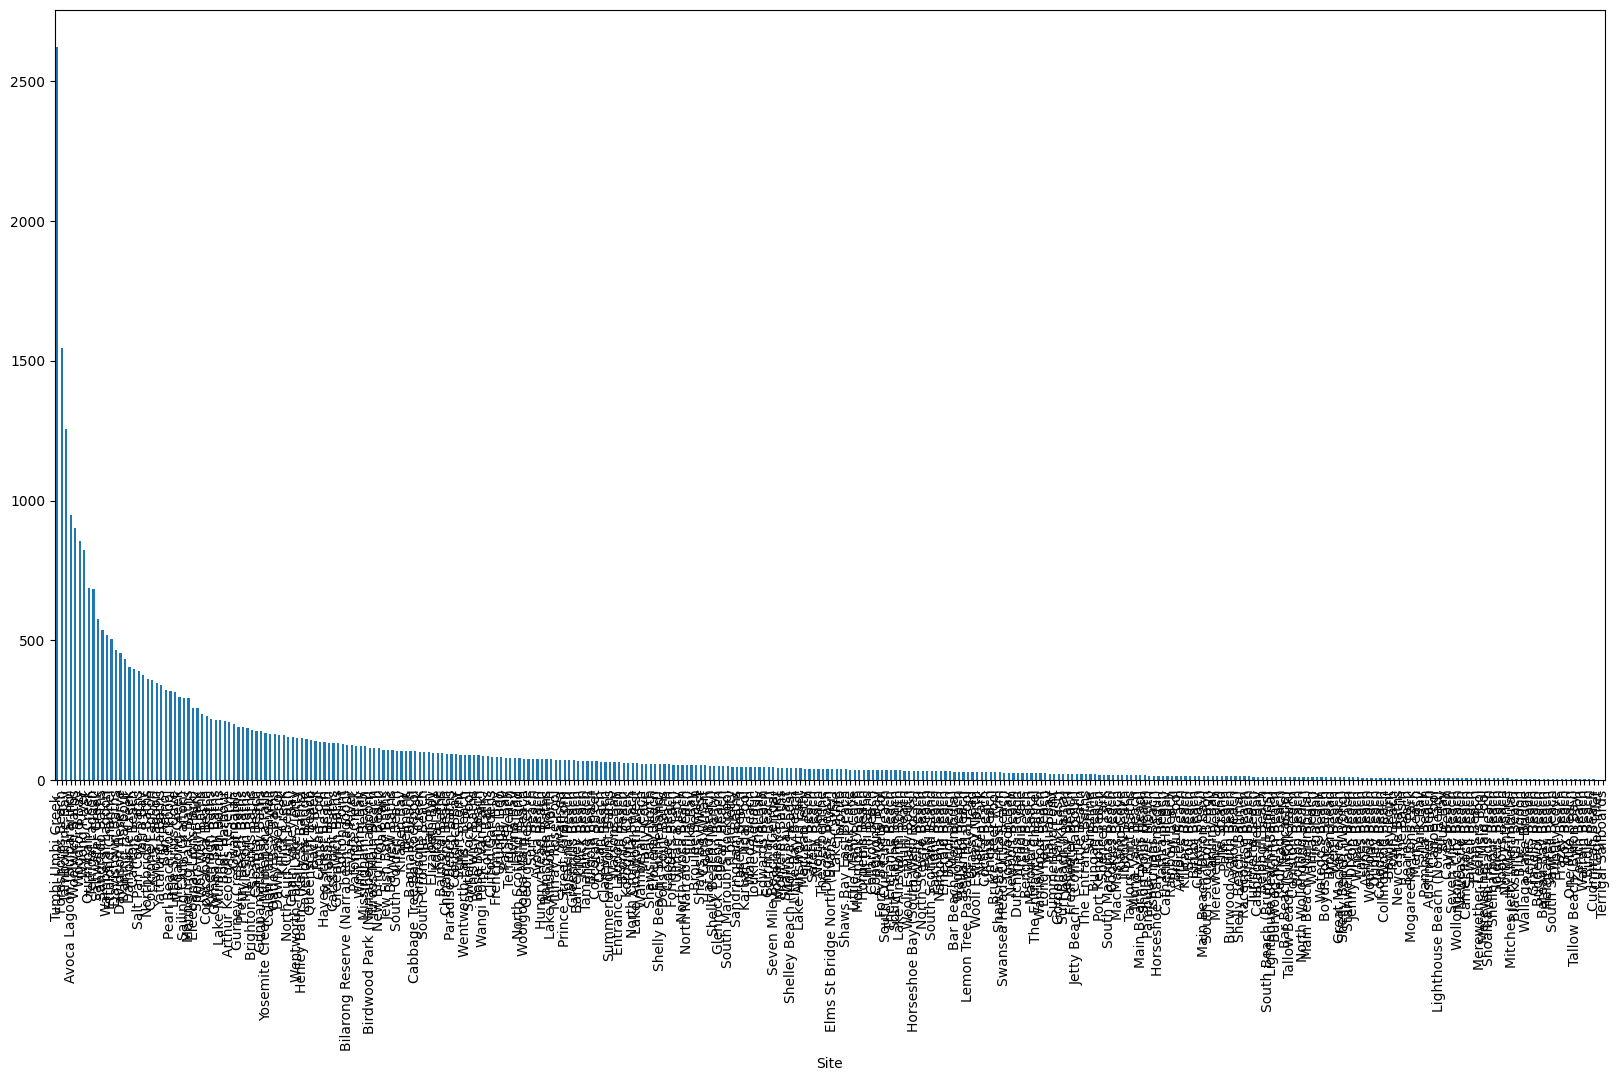

In [25]:

# Rank and plot the sites by the amount of Enterococci

# Group data by Site and calculate the mean Enterococci value
df_grouped = df.groupby('Site')['Enterococci (cfu/100ml)'].mean()

# Sort the values in descending order
df_sorted = df_grouped.sort_values(ascending=False)

# Plot the sorted values as a bar chart
df_sorted.plot(kind='bar', figsize=(20,10))


In [26]:
df.sketch.howto("Rank and plot the sites by the amount of Enterococci through time")

In [46]:

# Rank and plot the sites by the amount of Enterococci through time

# Group data by Site and Date
df_grouped = df.groupby(['Site', 'Date'])['Enterococci (cfu/100ml)'].mean().reset_index().fillna(0)

In [47]:
df_grouped

Site       Date  Enterococci (cfu/100ml)
0       Airforce Beach 2006-10-24                      2.0
1       Airforce Beach 2006-10-31                      0.0
2       Airforce Beach 2006-11-07                      2.0
3       Airforce Beach 2006-11-14                      0.0
4       Airforce Beach 2006-11-21                      0.0
...                ...        ...                      ...
300512    Zenith Beach 2023-02-24                      2.0
300513    Zenith Beach 2023-03-02                      1.0
300514    Zenith Beach 2023-03-08                      1.0
300515    Zenith Beach 2023-03-14                      1.0
300516    Zenith Beach 2023-03-26                      0.0

[300517 rows x 3 columns]

In [48]:

# Create a pivot table to rank sites by Enterococci
df_pivot = df_grouped.pivot(index='Site', columns='Date', values='Enterococci (cfu/100ml)')


In [49]:
df_pivot.fillna(0, inplace=True)

In [50]:
df_pivot.mean(axis=1)

Site
Airforce Beach                       0.841046
Arcadia Vale                         0.479229
Arthur Keoughs Reserve               0.561020
Aslings Beach                        0.116444
Austinmer Beach                      0.468037
                                      ...    
Wyong River                         24.154864
Yarra Bay                           56.394102
Yattalunga Baths                    13.613216
Yosemite Creek - Minnehaha Falls     1.251399
Zenith Beach                         0.534438
Length: 342, dtype: float64

In [51]:
df_pivot


Date                              1989-01-03  1989-01-05  1989-01-09   
Site                                                                   
Airforce Beach                           0.0         0.0         0.0  \
Arcadia Vale                             0.0         0.0         0.0   
Arthur Keoughs Reserve                   0.0         0.0         0.0   
Aslings Beach                            0.0         0.0         0.0   
Austinmer Beach                          0.0         0.0         0.0   
...                                      ...         ...         ...   
Wyong River                              0.0         0.0         0.0   
Yarra Bay                                0.0         0.0         0.0   
Yattalunga Baths                         0.0         0.0         0.0   
Yosemite Creek - Minnehaha Falls         0.0         0.0         0.0   
Zenith Beach                             0.0         0.0         0.0   

Date                              1989-01-12  1989-01-16  1989-01-17   
Site                                                                   
Airforce Beach                           0.0         0.0         0.0  \
Arcadia Vale                             0.0         0.0         0.0   
Arthur Keoughs Reserve                   0.0         0.0         0.0   
Aslings Beach                            0.0         0.0         0.0   
Austinmer Beach                          0.0         0.0         0.0   
...                                      ...         ...         ...   
Wyong River                              0.0         0.0         0.0   
Yarra Bay                                0.0         0.0         0.0   
Yattalunga Baths                         0.0         0.0         0.0   
Yosemite Creek - Minnehaha Falls         0.0         0.0         0.0   
Zenith Beach                             0.0         0.0         0.0   

Date                              1989-01-19  1989-01-23  1989-01-25   
Site                                                                   
Airforce Beach                           0.0         0.0         0.0  \
Arcadia Vale                             0.0         0.0         0.0   
Arthur Keoughs Reserve                   0.0         0.0         0.0   
Aslings Beach                            0.0         0.0         0.0   
Austinmer Beach                          0.0         0.0         0.0   
...                                      ...         ...         ...   
Wyong River                              0.0         0.0         0.0   
Yarra Bay                                0.0         0.0         0.0   
Yattalunga Baths                         0.0         0.0         0.0   
Yosemite Creek - Minnehaha Falls         0.0         0.0         0.0   
Zenith Beach                             0.0         0.0         0.0   

Date                              1989-01-30  ...  2023-03-21  2023-03-22   
Site                                          ...                           
Airforce Beach                           0.0  ...        33.0         0.0  \
Arcadia Vale                             0.0  ...         0.0         0.0   
Arthur Keoughs Reserve                   0.0  ...         0.0         0.0   
Aslings Beach                            0.0  ...         0.0         0.0   
Austinmer Beach                          0.0  ...         0.0         0.0   
...                                      ...  ...         ...         ...   
Wyong River                              0.0  ...         0.0         0.0   
Yarra Bay                                0.0  ...         4.0         0.0   
Yattalunga Baths                         0.0  ...        10.0         0.0   
Yosemite Creek - Minnehaha Falls         0.0  ...         0.0         0.0   
Zenith Beach                             0.0  ...         0.0         0.0   

Date                              2023-03-23  2023-03-26  2023-03-27   
Site                                                                   
Airforce Beach                           0.

In [54]:
########

# TODO: Need to drop beaches not in the 160

In [53]:
df_pivot.plot()

<Axes: xlabel='Site'>

ValueError: Image size of 547x194682 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>

In [52]:

# Sort the pivot table by highest average Enterococci
df_sorted = df_pivot.sort_values(by=df_pivot.mean(axis=1), ascending=False)


KeyError: Site
Airforce Beach                       0.841046
Arcadia Vale                         0.479229
Arthur Keoughs Reserve               0.561020
Aslings Beach                        0.116444
Austinmer Beach                      0.468037
                                      ...    
Wyong River                         24.154864
Yarra Bay                           56.394102
Yattalunga Baths                    13.613216
Yosemite Creek - Minnehaha Falls     1.251399
Zenith Beach                         0.534438
Length: 342, dtype: float64